Import libraries

In [43]:
library(tidyverse)
library(xts)
library(tbl2xts)

In [44]:
madrid_2001 = read_csv("datasets/csvs_per_year/madrid_2001.csv")

Rows: 217872 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PXY, SO_2, TC...
dttm  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [69]:
df = read_csv("datasets/csvs_per_year/madrid_2001.csv", show_col_types = FALSE)
for (i in 2002:2018){
    url = paste("datasets/csvs_per_year/madrid_", i, ".csv", sep='')
    df = bind_rows(df, read_csv(url, show_col_types = FALSE))  
}

df = df %>%
    select(date, CO, NO_2, SO_2, PM10) %>%
    group_by(date) %>% summarise(across(
        .cols = where(is.numeric), 
        .fns = list(Mean = mean), na.rm = TRUE, 
        .names = "{col}"
        ))

df.xts = tbl_xts(df)

Rows: 217872 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PXY, SO_2, TC...
dttm  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 217296 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PXY, SO_2, TC...
dttm  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 243984 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): BEN, CO, EBE, MXY, NMHC, NO_2, NOx, OXY, O_3, PM10, PXY, SO_2, TC...
dttm  (1): date


ℹ Use `spec()` to retrieve the


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 209496 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (13): BEN, CO, EBE, NMHC, NO, NO_2, O_3, PM10, PM25, SO_2, TCH, TOL, st...
dttm  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 210120 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (15): BEN, CH4, CO, EBE, NMHC, NO, NO_2, NOx, O_3, PM10, PM25, SO_2, TC...
dttm  (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 69096 Columns: 16

── Column specification ─────────────────────────────────────────────

date,CO,NO_2,SO_2,PM10
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
2001-01-01 01:00:00,1.2568,55.2876,22.1004,30.66042
2001-01-01 02:00:00,2.2696,55.8484,24.0064,41.03591
2001-01-01 03:00:00,2.3544,55.7208,25.4832,56.34522
2001-01-01 04:00:00,2.0456,56.5968,23.6180,47.97208
2001-01-01 05:00:00,1.4376,53.8276,20.0304,36.63708
2001-01-01 06:00:00,0.8504,49.3928,15.5528,21.12875


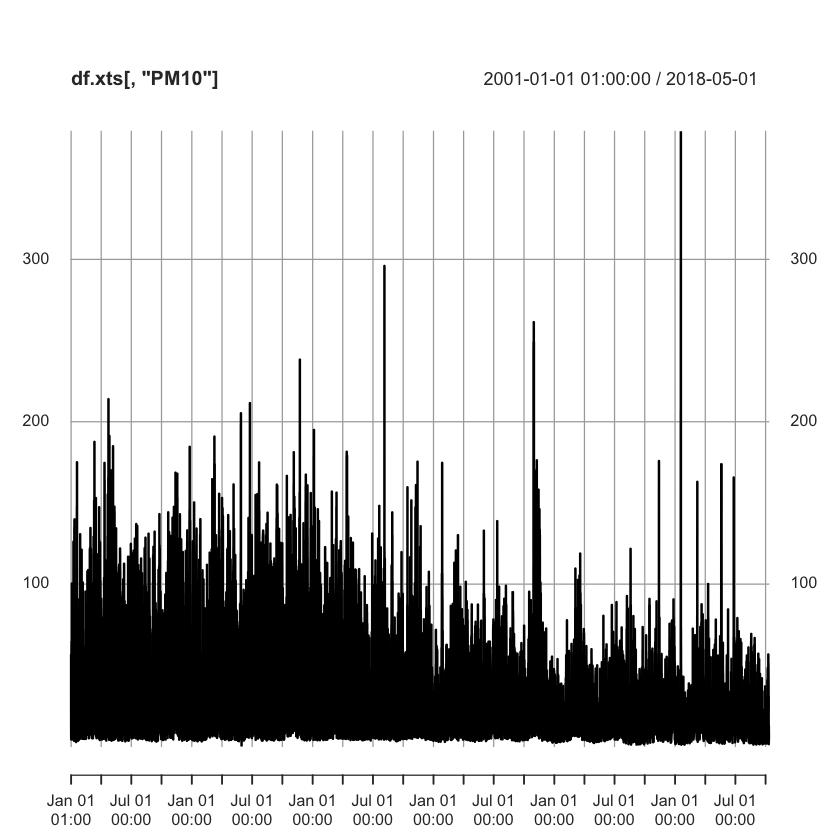

In [78]:
plot(df.xts[,"PM10"])